In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
bnb = pd.read_csv('/Users/Downloads/bnb_hist.csv')
bnb.head()

,Start,End,Open,High,Low,Close,Volume,Market Cap
0,2020-03-21,2020-03-22,11.921187,12.390215,11.375652,12.014853,3.605097e+08,1.850659e+09
1,2020-03-22,2020-03-23,12.033087,12.419842,11.121376,11.185927,2.982889e+08,1.849093e+09
2,2020-03-23,2020-03-24,11.194168,12.297670,10.939252,12.135018,2.784084e+08,1.797232e+09
3,2020-03-24,2020-03-25,12.177448,12.494054,11.938683,12.387652,2.984601e+08,1.905069e+09
4,2020-03-25,2020-03-26,12.394506,12.634314,12.105101,12.323927,2.741080e+08,1.912528e+09


In [5]:
bnb.drop('End', axis=1, inplace=True)

In [6]:
bnb.rename(columns={'Start' : 'Date'}, inplace=True)

bnb.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2020-03-21,11.921187,12.390215,11.375652,12.014853,3.605097e+08,1.850659e+09
1,2020-03-22,12.033087,12.419842,11.121376,11.185927,2.982889e+08,1.849093e+09
2,2020-03-23,11.194168,12.297670,10.939252,12.135018,2.784084e+08,1.797232e+09
3,2020-03-24,12.177448,12.494054,11.938683,12.387652,2.984601e+08,1.905069e+09
4,2020-03-25,12.394506,12.634314,12.105101,12.323927,2.741080e+08,1.912528e+09


In [7]:
bnb.shape

(1825, 7)

In [8]:
bnb.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [9]:
bnb.duplicated().sum()

0

Exploratory Data Analysis

In [10]:
bnb.describe()

,Open,High,Low,Close,Volume,Market Cap
count,1825.000000,1825.000000,1825.000000,1825.000000,1.825000e+03,1.825000e+03
mean,333.721737,341.978453,325.094056,334.075215,2.681075e+09,5.191073e+10
std,198.077773,202.642084,193.106051,198.076205,3.005567e+09,3.012203e+10
min,11.194168,12.195070,10.939252,11.185927,1.688133e+08,1.797232e+09
25%,231.984115,237.259300,226.763968,231.987700,1.024509e+09,3.622354e+10
50%,310.160000,315.643429,304.275700,309.804100,1.741781e+09,4.896110e+10
75%,511.632563,527.441892,498.652871,513.622746,3.088998e+09,7.977730e+10
max,751.603800,792.401600,731.824100,749.914900,2.794542e+10,1.115379e+11


In [11]:
bnb['year'] = pd.DatetimeIndex(bnb['Date']).year
bnb['month'] = pd.DatetimeIndex(bnb['Date']).month

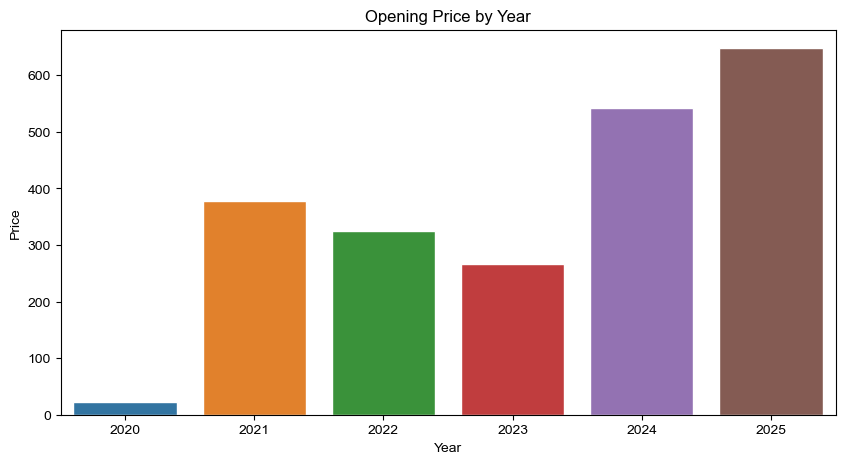

In [12]:
# Opening price by year

def open_price_year(bnb):
    fig, ax = plt.subplots(figsize=(10,5))
    sns.set_style('whitegrid')
    sns.barplot(x='year', y='Open', data=bnb, ci=None)
    ax.set_xlabel('Year')
    ax.set_ylabel('Price')
    ax.set_title('Opening Price by Year')
    plt.show
    
open_price_year(bnb)

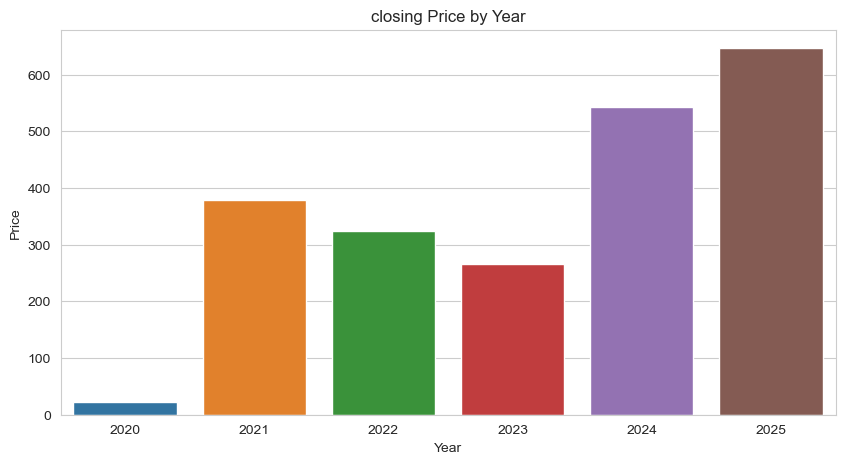

In [13]:
# Closing price by year

def close_price_year(bnb):
    fig, ax = plt.subplots(figsize=(10,5))
    sns.set_style('whitegrid')
    sns.barplot(x='year', y='Close', data=bnb, ci=None)
    ax.set_xlabel('Year')
    ax.set_ylabel('Price')
    ax.set_title('closing Price by Year')
    plt.show
    
close_price_year(bnb)

<AxesSubplot:xlabel='year', ylabel='Volume'>

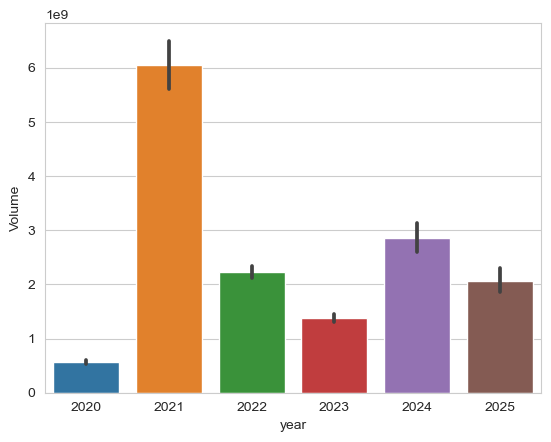

In [14]:
# Plotting year and Volume

sns.barplot(x='year', y='Volume', data=bnb)

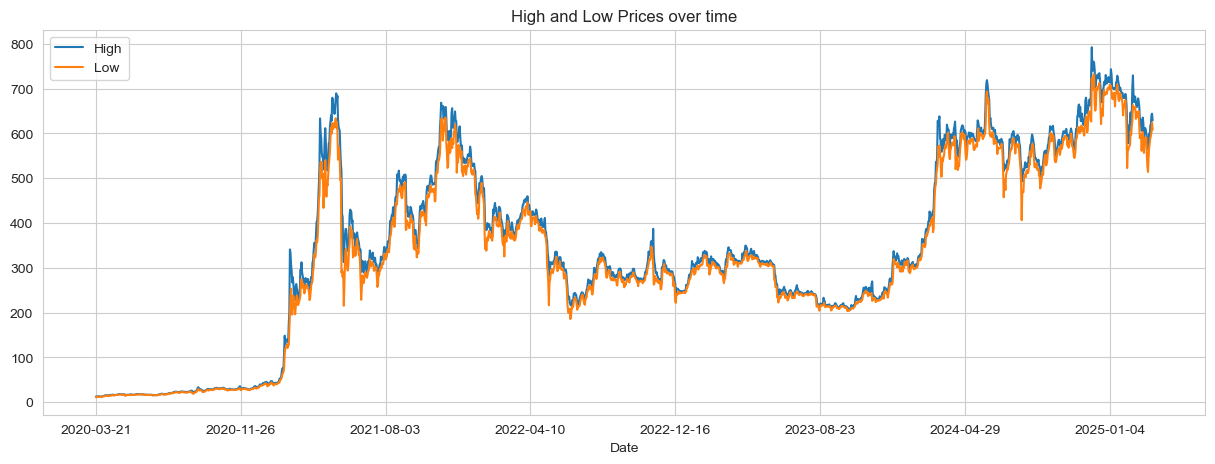

In [16]:
# High and Low price over time

high_low = bnb[['Date', 'High', 'Low']]

high_low.set_index('Date').plot(figsize=(15, 5), title='High and Low Prices over time');


<AxesSubplot:ylabel='High'>

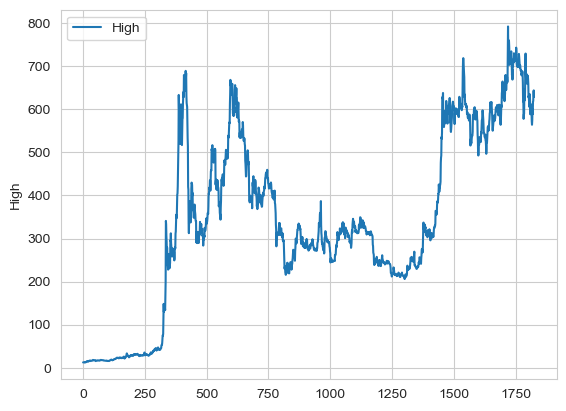

In [17]:
x = high_low.index
sns.lineplot(x=x, y='High', data=high_low, label='High')

<AxesSubplot:ylabel='Low'>

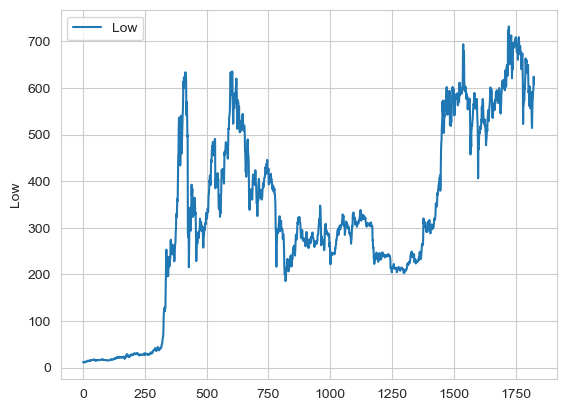

In [19]:
sns.lineplot(x=x, y='Low', data=high_low, label='Low')

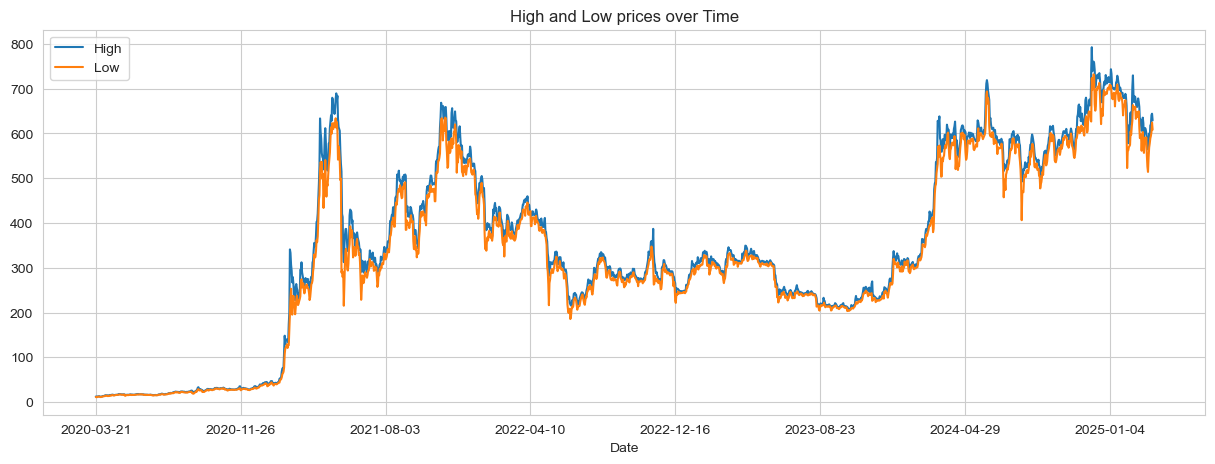

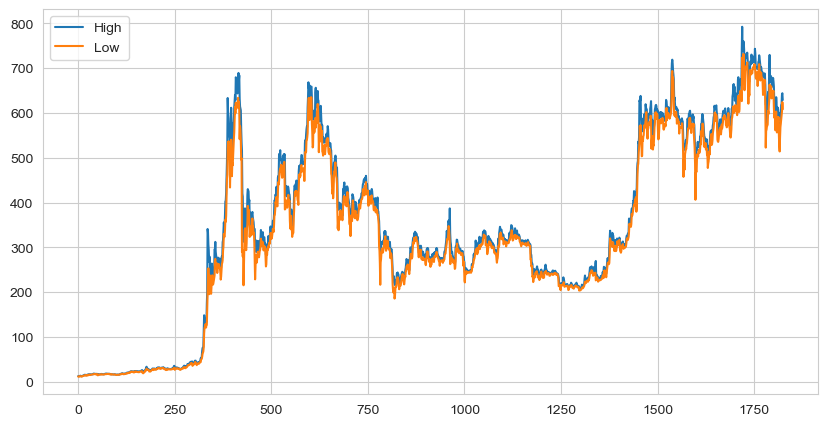

In [20]:
# High Low prices over time

high_low.groupby('Date').mean().plot(figsize=(15, 5),
                                    title='High and Low prices over Time')
high_low.plot(figsize=(10, 5));

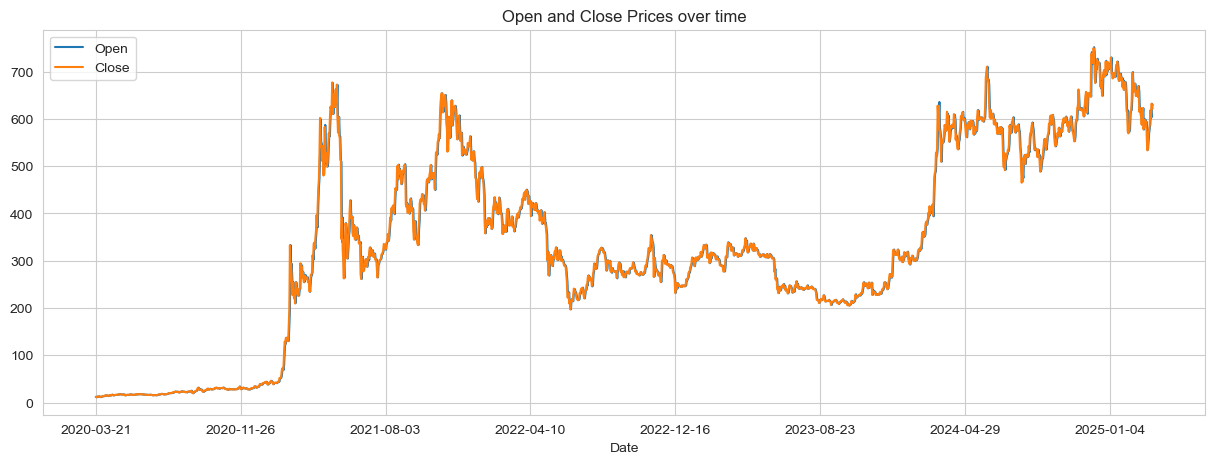

In [21]:
# Repeat the same method for Open and Close Prices as well

high_low = bnb[['Date', 'Open', 'Close']]

high_low.set_index('Date').plot(figsize=(15, 5), title='Open and Close Prices over time');


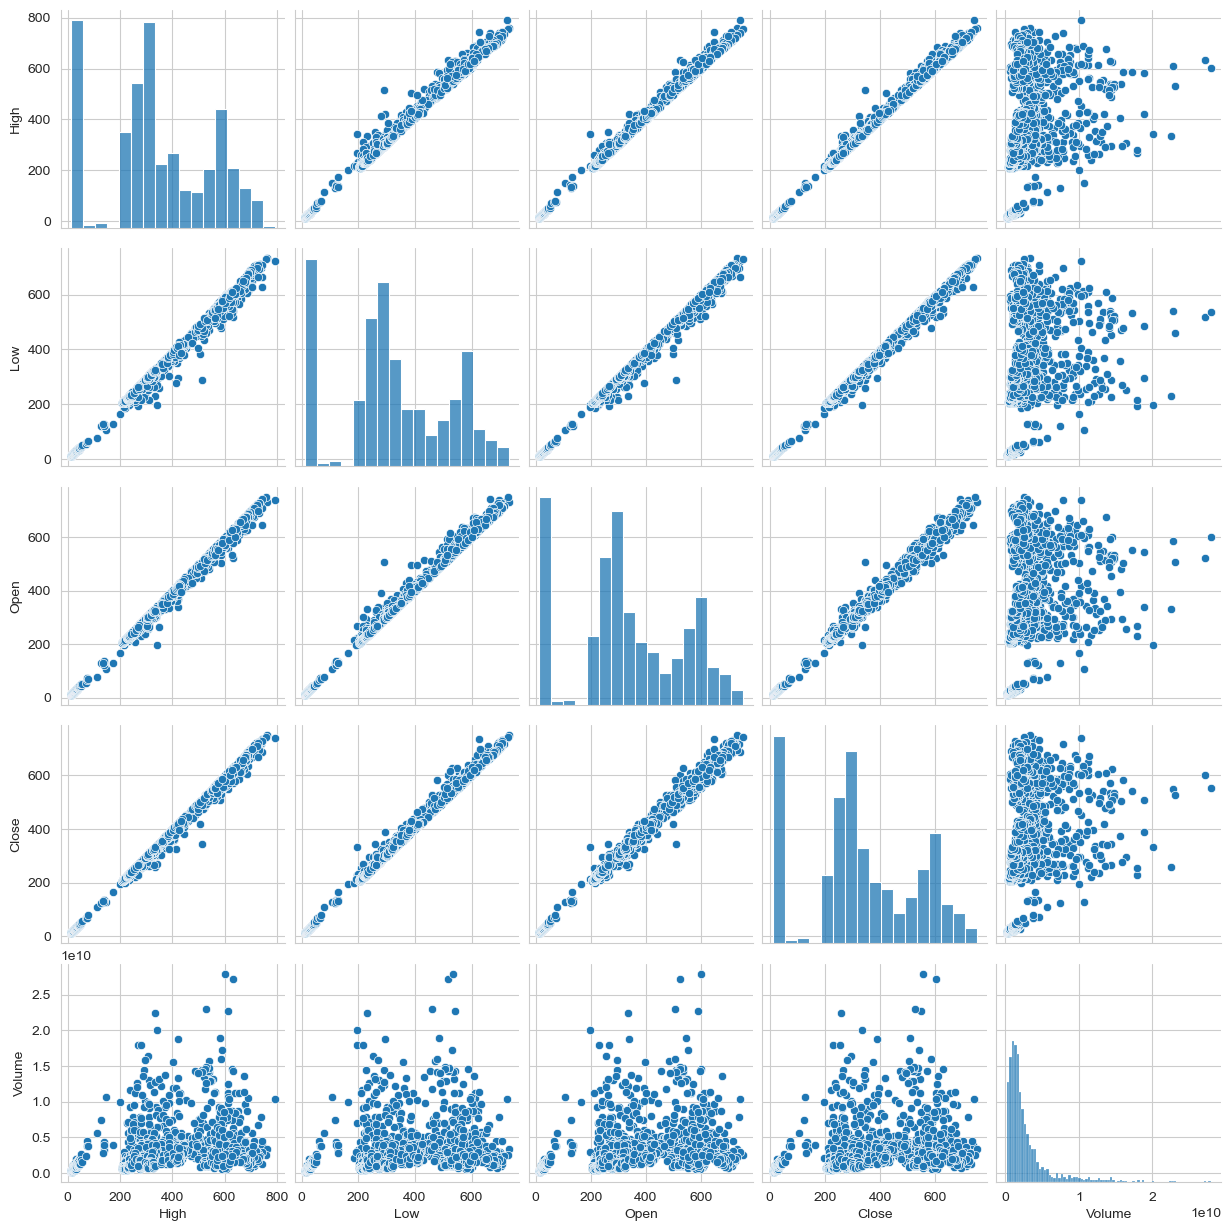

In [22]:
sns.pairplot(bnb[['High', 'Low', 'Open', 'Close', 'Volume']]);

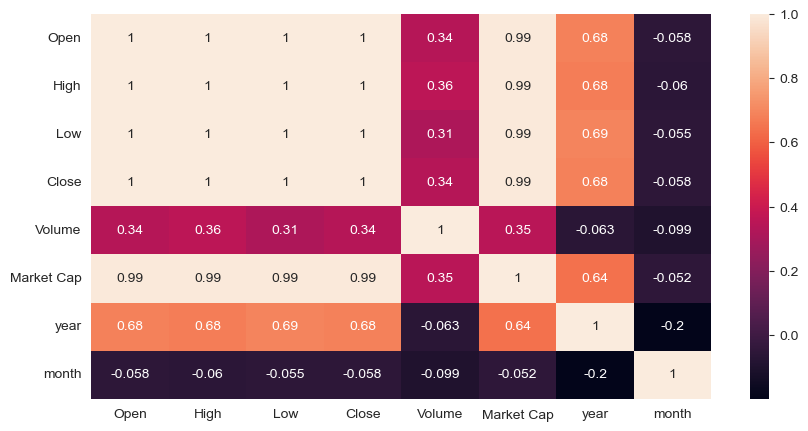

In [23]:
correlation = bnb.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(correlation, annot=True);